## 4.1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8026969481902059

## 4.2 Accuracy and dummy model

In [8]:
len(y_val)

1409

In [9]:
(y_val == churn_decision).sum()

1131

In [10]:
1132/ 1409 

0.8034066713981547

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_val, churn_decision)

0.8026969481902059

In [13]:
accuracy_score(y_val, y_pred >= 0.5)

0.8026969481902059

In [14]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.738
0.30 0.760
0.35 0.773
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.733
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [15]:
scores

[0.2739531582682754,
 0.5102909865152591,
 0.5911994322214337,
 0.6664300922640171,
 0.7097232079489,
 0.7381121362668559,
 0.7601135557132718,
 0.772888573456352,
 0.7849538679914834,
 0.7927608232789212,
 0.8026969481902059,
 0.801277501774308,
 0.794889992902768,
 0.7863733144073811,
 0.765791341376863,
 0.7444996451383961,
 0.7331440738112136,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

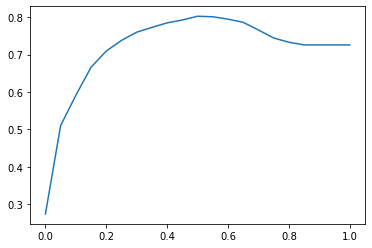

In [16]:
plt.plot(thresholds, scores)

In [17]:
from collections import Counter

In [18]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [19]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [20]:
y_val.mean()

0.2739531582682754

In [21]:
1 - y_val.mean()

0.7260468417317246

## 4.3 Confusion Table

In [22]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [23]:
actual_positive

array([False, False, False, ..., False,  True,  True])

In [24]:
actual_negative

array([ True,  True,  True, ...,  True, False, False])

In [25]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [26]:
predict_positive

array([False, False, False, ..., False,  True,  True])

In [27]:
predict_negative

array([ True,  True,  True, ...,  True, False, False])

In [28]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [29]:
tn

922

In [30]:
tp

209

In [31]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [32]:
fp, fn

(101, 177)

In [33]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [34]:
confusion_matrix

array([[922, 101],
       [177, 209]])

In [35]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.13, 0.15]])

## Precision and Recall

In [36]:
(tp + tn) / (tp + tn + fp + fn)

0.8026969481902059

In [37]:
p = tp / (tp + fp)
p

0.6741935483870968

In [38]:
tp + fp

310

In [39]:
r = tp / (tp + fn)
r

0.5414507772020726

In [40]:
tp + fn

386

## ROC Curves

In [41]:
tpr = tp / (tp + fn)
tpr

0.5414507772020726

In [42]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [43]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t) 
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [44]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 911, 1, 112),
 (0.02, 384, 831, 2, 192),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 683, 7, 340),
 (0.06, 377, 661, 9, 362),
 (0.07, 372, 642, 14, 381),
 (0.08, 371, 613, 15, 410),
 (0.09, 369, 581, 17, 442),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 364, 510, 22, 513),
 (0.13, 360, 476, 26, 547),
 (0.14, 355, 452, 31, 571),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 421, 39, 602),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 383, 42, 640),
 (0.19, 338, 368, 48, 655),
 (0.2, 333, 356, 53, 667),
 (0.21, 328, 340, 58, 683),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 315, 302, 71, 721),
 (0.25, 309, 292, 77, 731),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 296, 255, 90, 768),
 (0.29, 290, 243, 96, 780),
 (0.3, 284, 236, 102, 787),
 (0.31, 279, 229, 107, 794),
 (0.32, 278, 225, 108, 798),
 (0.33, 276, 220, 110, 803),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [45]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [46]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,911,1,112
2,0.02,384,831,2,192
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [47]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,209,101,177,922
60,0.6,150,53,236,970
70,0.7,75,19,311,1004
80,0.8,11,1,375,1022
90,0.9,0,0,386,1023


In [48]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn) 
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [49]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,209,101,177,922,0.541451,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,19,311,1004,0.194301,0.018573
80,0.8,11,1,375,1022,0.028497,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


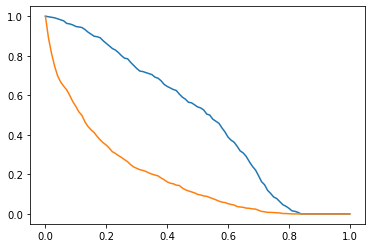

In [50]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')

## Random Model

In [52]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [53]:
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [54]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [57]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t) 

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn) 
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [58]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [59]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


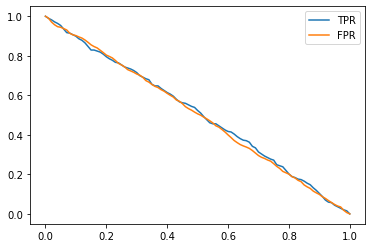

In [60]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

## Ideal model

In [61]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [62]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [63]:
1 - y_val.mean()

0.7260468417317246

In [64]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [65]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


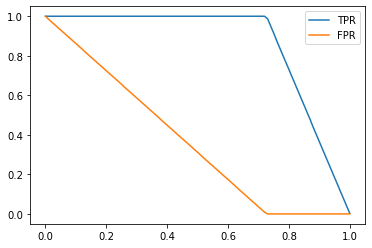

In [66]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

## Putting everything together

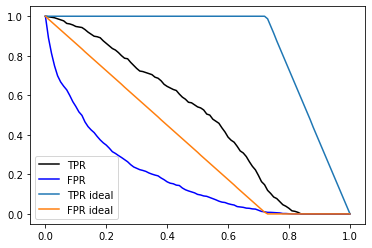

In [67]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

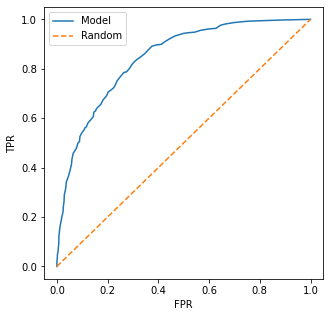

In [68]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [69]:
from sklearn.metrics import roc_curve

In [70]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

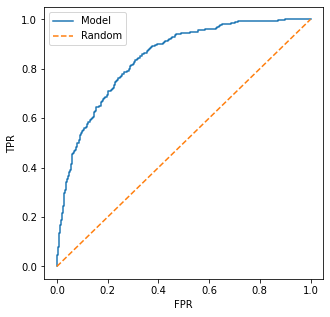

In [71]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## 4.6 ROC AUC
* Area under the ROC curve - useful metric
* Interpretation of AUC

In [72]:
from sklearn.metrics import auc

In [73]:
auc(fpr, tpr)

0.8440049838177868

In [74]:
auc(df_scores.fpr, df_scores.tpr)

0.8438340449455275

In [75]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [76]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8440049838177868

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(y_val, y_pred)

0.8440049838177868

In [79]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [80]:
import random

In [81]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84477

In [82]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84688

## 4.7 Cross-Validation
* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

In [84]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [85]:
dv, model = train(df_train, y_train, C=0.001)

In [86]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [87]:
y_pred = predict(df_val, dv, model)

In [88]:
from sklearn.model_selection import KFold

In [89]:
!pip install tqdm

In [90]:
from tqdm.auto import tqdm

In [91]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:05<00:30,  5.15s/it]

C=0.001 0.825 +- 0.009


 29%|██▊       | 2/7 [00:09<00:23,  4.66s/it]

C=0.01 0.840 +- 0.009


 43%|████▎     | 3/7 [00:14<00:19,  4.83s/it]

C=0.1 0.841 +- 0.007


 57%|█████▋    | 4/7 [00:18<00:13,  4.63s/it]

C=0.5 0.840 +- 0.007


 71%|███████▏  | 5/7 [00:23<00:09,  4.50s/it]

C=1 0.840 +- 0.008


 86%|████████▌ | 6/7 [00:28<00:04,  4.65s/it]

C=5 0.841 +- 0.007


100%|██████████| 7/7 [00:32<00:00,  4.66s/it]

C=10 0.841 +- 0.008


In [92]:
scores

[0.843658500208021,
 0.8458089160376109,
 0.83335741521172,
 0.8320190094007803,
 0.8523226444102789]

In [93]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259